# Programming for Data Analysis
## Project 1 
## Title: IQ Test 
### Author: Andras Csullog

![IQ](https://www.arealme.com/newimg/tn_@2x_iq-2019.png)

# Introduction


## Intelligence quotient and the abbreviation (IQ) from psychologist William Stern [1]

### Unlike temperature or speed, intelligence is not a concrete measure but an estimate.  Historically achieved by dividing a person's mental age score, obtained by administering an intelligence test, by the person's chronological age. Given the abstract nature of the concept, intelligence and ways of measuring and statistics bear a level of contradiction.

### While IQ has been measured for over 100 years now, there are still debates about heritability estimates and the mechanisms of inheritance, on the other hand IQ scores have shown to be associated with such factors as, social economics, nutrition, mortality, social status and strong predictors of job performance and income.


## Reliability and validity of tests, test bias
High statistical reliability based on measurement consistency of the test meaning similar scores upon repetition. The confidence interval is approximately 10 points while standard error of measurement as low as 3 points.
To note IQ tests may fail to serve as an accurate measure of broader definitions of human intelligence inclusive of, for example, creativity and social intelligence.

Differential item functioning (DIF), sometimes referred to as measurement bias, is a phenomenon when participants from different groups (e.g. gender, race, disability) with the same latent abilities give different answers to specific questions on the same IQ test. [2]


### Flynn effect
Since the early 20th century, raw scores on IQ tests have increased in most parts of the world. When a new version of an IQ test is normed, the standard scoring is set so performance at the population median results in a score of IQ 100. The phenomenon of rising raw score performance means if test-takers are scored by a constant standard scoring rule, IQ test scores have been rising at an average rate of around three IQ points per decade. This phenomenon was named the Flynn effect in the book The Bell Curve after James R. Flynn, the author who did the most to bring this phenomenon to the attention of psychologists [3]

## Data set and Variables

My data set consist of four columns 'IQ_Score','Gender','Social Economics','DOB_Year'and an additional index column for helping to assign the appropiate gender to the randomly generated IQ score.
There are 1000 elements for each category, male/female 50/50 ratio.


- #### IQ score
Generated points with random normal distribution,
Female score mean 100/ standard deviation 12 / 500 items
Male score matching 100 mean while slightly higher standard deviation 18 (males have more variability, which leads to a higher number of males in both tails of the Gaussian distribution *H. Nyborg; Intelligence 52 (2015) 44–62. / Richard Haier Sex differences [7]

- #### Date of Birth DOB_Year
Randomly generated integers from 1900 to 1999, later to be used for adjusting IQ score with Flynn-effect [4]

- #### "Fynn IQ Score"
Above generated IQ score is adjusted for the so-called Flynn-effect, every decade from 1900 raw IQ scores have risen by an average of 3 points. Based on the randomly generated dob year of from 1950 above 0.3 points added per year and same detracted from 1950 to 1900. Splitting at half term allowed me to keep overall mean at 100 for total set of randomly generated gaussian distributed numbers.

- #### Social Economics score
Made up measurement with linear correlation between IQ score and factors of social economics, nutrition, social status. Achieved by normalizing the modified IQ score now Flynn IQ to a range between 1-100. as higher the number as better the individual nutrition social, status, education.

- #### Gender
Male / Female IQ scores generated separately and class tagged using index number and condition [5] [6]


## Correlation between variables

IQ male and female generated with only standard deviation varying form each other, DOB birth assigned randomly to the population. Flynn IQ one to one correlation with IQ score having shifted values based on date of birth year.
social economic score in data base has a linear relationship with Flynn IQ


My attempt is to analyse whether there are significant differences between genders, if IQ score have increased or decreased in the last century, relation between social economics score and IQ values.


In [1]:
%matplotlib inline

In [2]:
# Setting import modules
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Setup and simulate data set

In [3]:
# Setting IQ score for male and female, both random Gaussian distribution, 
# mean 100, standard deviation vaires higher for male, 500 elements each
iqm = np.random.normal(100 , 17 , 500)
iqf = np.random.normal(100 , 13 , 500)

# Setting date of brith year for male and female in a rande range between 1900 and 2000
# method used Numpy random integer, 500 elements each 
dobym = np.random.randint(1900, 2000, 500)
dobyf = np.random.randint(1900, 2000, 500)
doby_x = np.concatenate([dobym, dobyf])

# Modifying IQ score for male and female based on the Flynn-effect and concatenate them.
# based on date of birth year IQ scores inherit an additional 0.3 points if born after 1950 and
# decreased by same amount if born before gradually towards 1900.
# Increase/decrease splitted half term to prevent skewing mean of std distribution 
flynn_iqm = (dobym-1950)* 0.3 + iqm
flynn_iqf = (dobyf-1950)* 0.3 + iqf
flynn_x = np.concatenate([flynn_iqm, flynn_iqf])

# Defining a function which normalizes the IQ score to generate synthetised social score that has strong correllation
# with IQ score fitting them into 1-100 scale generating new set of data
def NormalizeData(flynn_x):
    return (flynn_x - np.min(flynn_x)) / (np.max(flynn_x) - np.min(flynn_x))*100
scaled_x = NormalizeData(flynn_x)

#Rounding normalized IQ score to give social score a more distinctive character 
social_economics = np.round(scaled_x)

# Setting a dataframe with 4 columns containing the variables which will be analysed
df = pd.DataFrame(columns = ['IQ_Score','Gender','Social Economics','DOB_Year'])

# Setting an index column to help assigning gender tag on IQ scores generated
df['Index'] = pd.Series(range(1,1001))
             
df['IQ_Score'] = np.concatenate([flynn_iqm, flynn_iqf])

# Creating a condition which assign 'male'/'female' value for the first and last 500 index
condition = [(df['Index'] <= 500), (df['Index'] > 500)]
gender = ['male', 'female']

df['Gender'] = np.select(condition, gender)

df['Social Economics'] = social_economics

df['DOB_Year'] = np.concatenate([dobym, dobyf])


In [4]:
df

,IQ_Score,Gender,Social Economics,DOB_Year,Index
0,111.234442,male,64.0,1943,1
1,111.514189,male,65.0,1967,2
2,114.796841,male,67.0,1972,3
3,99.435580,male,54.0,1944,4
4,104.073064,male,58.0,1911,5
...,...,...,...,...,...
995,125.686768,female,76.0,1987,996
996,116.552710,female,69.0,1959,997
997,96.914997,female,52.0,1994,998
998,125.300735,female,76.0,1981,999


## Analysis of data set

   ### Quick over view on descriptive statistics for numeric columns in a pandas DataFrame:

In [5]:
df.describe()

,IQ_Score,Social Economics,DOB_Year,Index
count,1000.000000,1000.0000,1000.000000,1000.000000
mean,99.966563,54.8620,1950.137000,500.500000
std,17.972522,15.0796,29.601461,288.819436
min,34.564000,0.0000,1900.000000,1.000000
25%,88.286451,45.0000,1924.000000,250.750000
50%,100.044605,55.0000,1950.000000,500.500000
75%,112.316661,65.0000,1977.000000,750.250000
max,153.774469,100.0000,1999.000000,1000.000000


### Analysing IQ scores

#### Using Seaborn kdeplot for graphical depiction - IQ scores with mean value of 100 points, standard deviation of 16.88 are forming a gaussian bell curve.,

#### A common type of distribution also know as normal distribution. symmetric curve centered around the mean, or average, of all the data points being measured. The width of a bell curve is determined by the standard deviation—68% of the data points are within one standard deviation of the mean, 95% of the data are within two standard deviations, and 99.7% of the data points are within three standard deviations of the mean.



<AxesSubplot:ylabel='Density'>

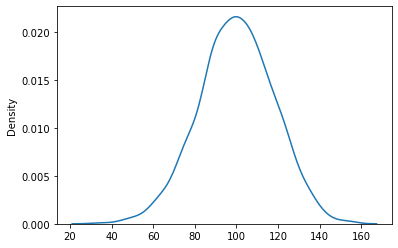

In [6]:
sns.kdeplot(data=flynn_x)

 ### Differences found between Male/Female IQ Score,

#### Seaborn kde plot used with separating Male and Female IQ scores represented with different coloures for easier comparison. Males have more variability, which leads to a higher number of males in both tails of the Gaussian distribution, while females graph more dense population around the mean.

<AxesSubplot:ylabel='Density'>

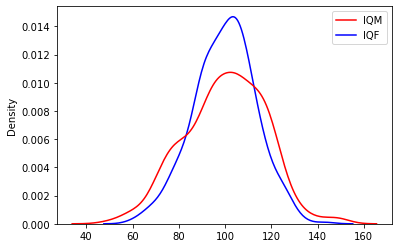

In [7]:
df1 = pd.DataFrame({"IQM": iqm, "IQF" : iqf})
sns.kdeplot(data=df1, palette=['red', 'blue'])

### IQ values in relation to Date of Birth

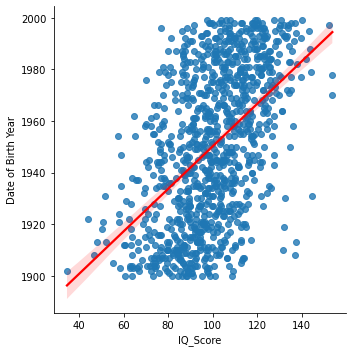

In [8]:
df2 = pd.DataFrame({"IQ_Score": flynn_x, "Date of Birth Year" : doby_x})
sns.lmplot(data=df2, x='IQ_Score', y='Date of Birth Year', line_kws={'color': 'r'})

### Relation between IQ Score and Social, Economic Score

<AxesSubplot:xlabel='IQ_Score', ylabel='Social Economics Score'>

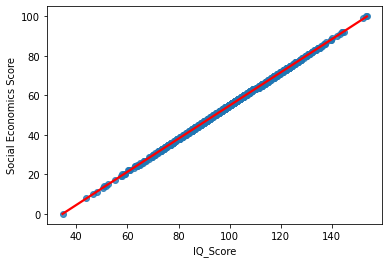

In [9]:
df3 = pd.DataFrame({"IQ_Score": flynn_x, "Social Economics Score" : social_economics})
sns.regplot(x="IQ_Score", y="Social Economics Score", data=df3, line_kws={'color': 'r'})

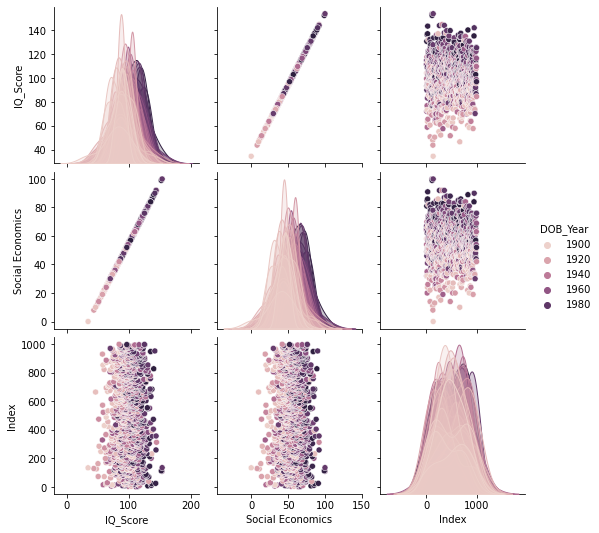

In [10]:
sns.pairplot(df, hue="DOB_Year")

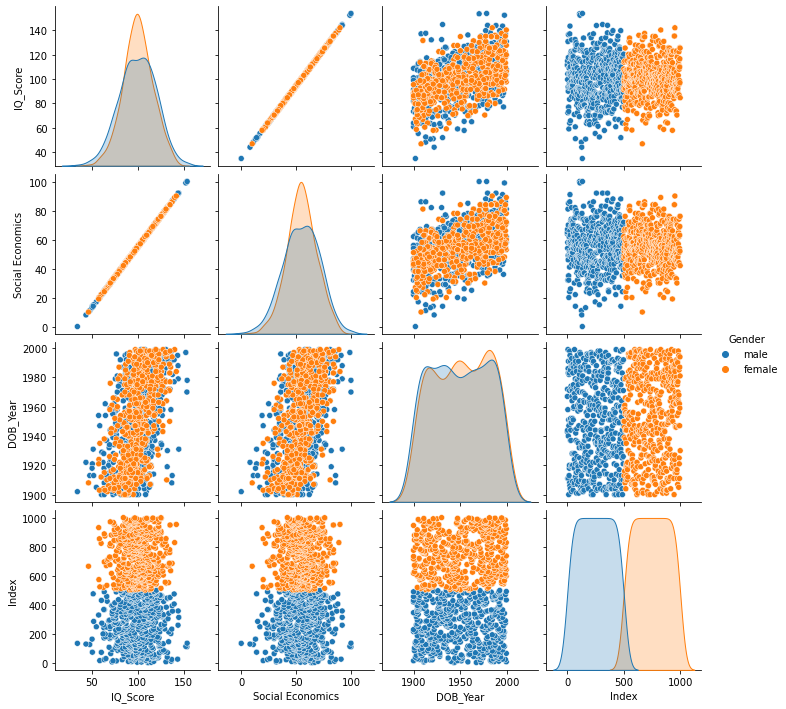

In [11]:
sns.pairplot(df, hue="Gender")

## References

- [1] https://en.wikipedia.org/wiki/Intelligence_quotient
- [2] https://en.wikipedia.org/wiki/Differential_item_functioning
- [3] https://en.wikipedia.org/wiki/Flynn_effect
- [4] https://blog.mindvalley.com/average-iq-score-by-age/
- [5] https://www.richardhaier.com/articles/sex-differences
- [6] https://www.quora.com/What-gender-differences-are-found-in-IQ-testing-and-why
- [7] https://www.richardhaier.com/articles/sex-differences



### Code references
- https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.plot.scatter.html
- https://sparkbyexamples.com/pandas/pandas-set-index-to-column-in-dataframe/
- https://datagy.io/pandas-conditional-column/
- https://seaborn.pydata.org/tutorial/regression.html
- https://www.investopedia.com/terms/b/bell-curve.asp
- https://seaborn.pydata.org/generated/seaborn.scatterplot.html
- https://stackoverflow.com/questions/46598371/overlay-a-line-function-on-a-scatter-plot-seaborn
- https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html
- https://sparkbyexamples.com/numpy/numpy-concatenate-arrays/
- https://www.folkstalk.com/tech/scale-values-in-0-100-python-with-code-examples/#:~:text=How%20do%20you%20scale%20a,min(x))%20*%20100.
- https://www.digitalocean.com/community/tutorials/seaborn-kdeplot
- https://stackoverflow.com/questions/73031820/overlay-kde-plot-using-seaborn-displot
- https://www.statology.org/pandas-describe/
- https://stackoverflow.com/questions/46598371/overlay-a-line-function-on-a-scatter-plot-seaborn